<a href="https://colab.research.google.com/github/BeLeap/tensorflow-nlp-tutorial/blob/main/06/04_Auto-Grad%26Linear-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

In [3]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]

In [4]:
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [5]:
@tf.function
def hypothesis(x):
  return w*x + b

In [7]:
x_test = [3.5, 5, 5.5, 6]
hypothesis(x_test).numpy()

array([15., 21., 23., 25.], dtype=float32)

In [8]:
@tf.function
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

In [9]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]

In [10]:
optimizer = tf.optimizers.SGD(0.01)

In [11]:
for i in range(301):
  with tf.GradientTape() as tape:
    y_pred = hypothesis(x)
    cost = mse_loss(y_pred, y)
  
  gradients = tape.gradient(cost, [w, b])

  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print("epoch: {:3} | w: {:5.4f} | b: {:5.4f} | cost: {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch:   0 | w: 8.2133 | b: 1.6644 | cost: 1402.555542
epoch:  10 | w: 10.4971 | b: 1.9769 | cost: 1.351182
epoch:  20 | w: 10.5047 | b: 1.9297 | cost: 1.328163
epoch:  30 | w: 10.5119 | b: 1.8844 | cost: 1.306966
epoch:  40 | w: 10.5188 | b: 1.8409 | cost: 1.287436
epoch:  50 | w: 10.5254 | b: 1.7991 | cost: 1.269459
epoch:  60 | w: 10.5318 | b: 1.7591 | cost: 1.252897
epoch:  70 | w: 10.5379 | b: 1.7206 | cost: 1.237644
epoch:  80 | w: 10.5438 | b: 1.6837 | cost: 1.223597
epoch:  90 | w: 10.5494 | b: 1.6483 | cost: 1.210658
epoch: 100 | w: 10.5548 | b: 1.6143 | cost: 1.198740
epoch: 110 | w: 10.5600 | b: 1.5817 | cost: 1.187767
epoch: 120 | w: 10.5650 | b: 1.5504 | cost: 1.177665
epoch: 130 | w: 10.5697 | b: 1.5204 | cost: 1.168354
epoch: 140 | w: 10.5743 | b: 1.4916 | cost: 1.159782
epoch: 150 | w: 10.5787 | b: 1.4639 | cost: 1.151890
epoch: 160 | w: 10.5829 | b: 1.4373 | cost: 1.144619
epoch: 170 | w: 10.5870 | b: 1.4119 | cost: 1.137924
epoch: 180 | w: 10.5909 | b: 1.3874 | cost: 

In [12]:
x_test = [3.5, 5, 5.5, 6]
hypothesis(x_test).numpy()

array([38.35479 , 54.295143, 59.608593, 64.92204 ], dtype=float32)

with Keras

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [14]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]

In [15]:
model = Sequential()

In [16]:
model.add(Dense(1, input_dim=1, activation='linear'))

In [17]:
sgd = optimizers.SGD(lr=0.01)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [18]:
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

In [20]:
model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 764ms/step - loss: 3944.8750 - mse: 3944.8750
Epoch 2/300
1/1 [==============================] - 0s 16ms/step - loss: 486.4731 - mse: 486.4731
Epoch 3/300
1/1 [==============================] - 0s 15ms/step - loss: 60.9414 - mse: 60.9414
Epoch 4/300
1/1 [==============================] - 0s 16ms/step - loss: 8.5816 - mse: 8.5816
Epoch 5/300
1/1 [==============================] - 0s 12ms/step - loss: 2.1379 - mse: 2.1379
Epoch 6/300
1/1 [==============================] - 0s 9ms/step - loss: 1.3438 - mse: 1.3438
Epoch 7/300
1/1 [==============================] - 0s 9ms/step - loss: 1.2448 - mse: 1.2448
Epoch 8/300
1/1 [==============================] - 0s 18ms/step - loss: 1.2314 - mse: 1.2314
Epoch 9/300
1/1 [==============================] - 0s 9ms/step - loss: 1.2286 - mse: 1.2286
Epoch 10/300
1/1 [==============================] - 0s 10ms/step - loss: 1.2270 - mse: 1.2270
Epoch 11/300
1/1 [==============================] - 0s 9ms/

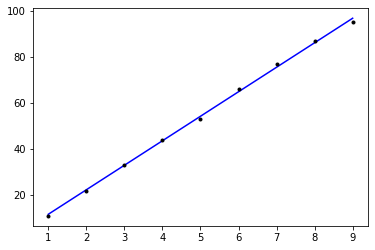

In [21]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [23]:
model.predict([9.5])

array([[102.160126]], dtype=float32)